In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"../input/student-performance-data/student_data.csv")

In [3]:
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


### Now let's understand those columns

school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

age - student’s age (numeric: from 15 to 22)

address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# EDA

In [7]:
df['address'].value_counts()

address
U    307
R     88
Name: count, dtype: int64

In [8]:
df['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

In [9]:
df['internet'].value_counts()

internet
yes    329
no      66
Name: count, dtype: int64

In [10]:
cols_string = df.columns

# data distributions

In [11]:
col_counts = dict(df.count(axis=0))
col_types = {c: d for c, d in dict(df.dtypes).items()   if col_counts[c] > 10 }
_is_num = lambda x: x in (np.int64, float)
# separate them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']
CATEGORICAL: ['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex']


In [12]:
# Aesthetic configuration for seaborn and matplotlib
plt.rcParams["font.family"] = "monospace"
sns.set_theme(style='darkgrid', palette='rocket')

# String Data Distributions

nb_pies=15 | nb_rows=15


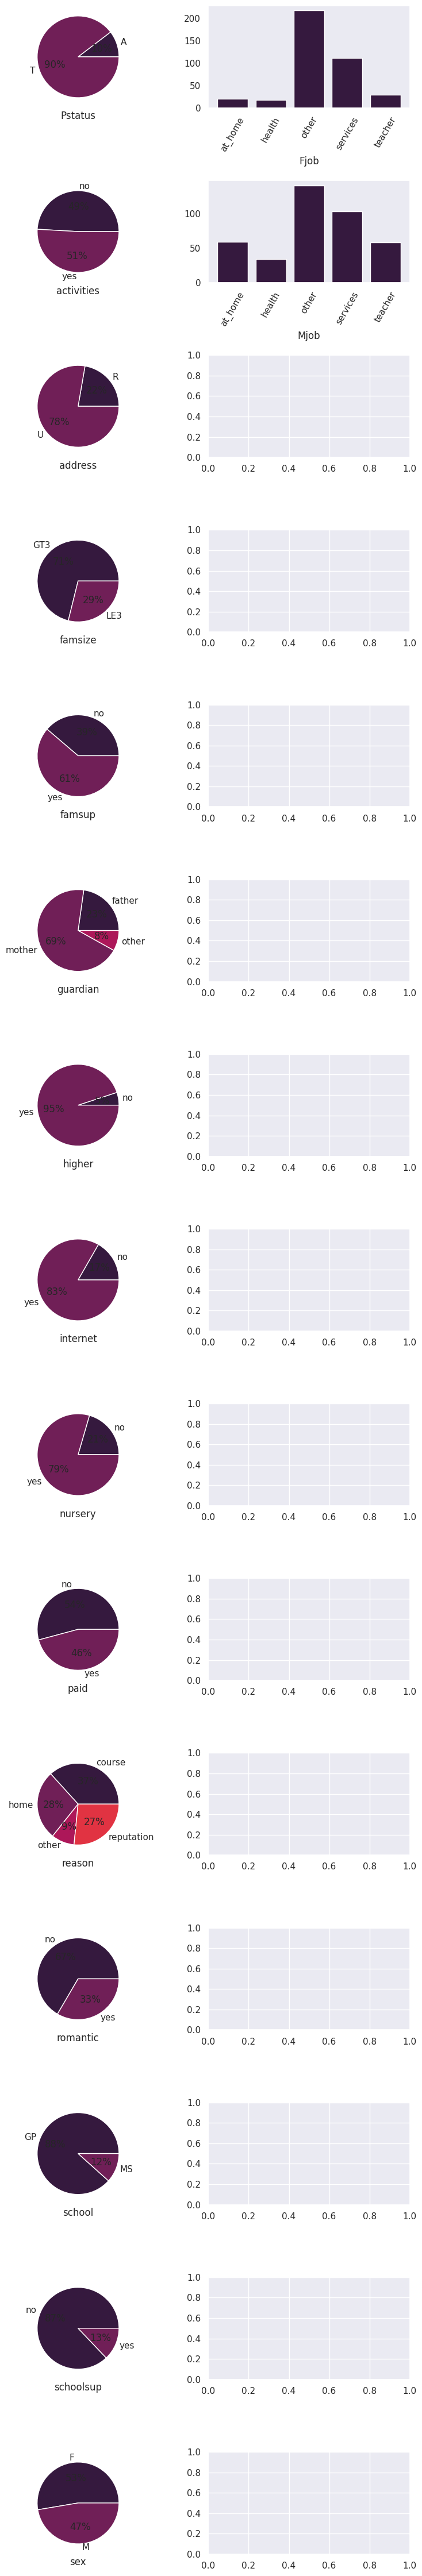

In [13]:
nb_pies = sum([len(df[c].dropna().unique()) < 5 for c in cols_string]) # is the maximum of the number of columns with less than 5 unique values 
nb_rows = max([nb_pies, len(cols_string) - nb_pies])
print(f"{nb_pies=} | {nb_rows=}")

fig, axarr = plt.subplots(ncols=2, nrows=nb_rows, figsize=(8, 3 * nb_rows))
i_0, i_1 = 0, 0
for col in cols_string:
    vals = df[col].values
    vals = vals[~pd.isnull(vals)] # filtered to remove any missing values.
    unique_values, counts = np.unique(vals, return_counts=True) # contain the unique values and counts of the column, respectively.
    
    if len(unique_values) < 5:
        axarr[i_0, 0].pie(counts, labels=unique_values, autopct='%.0f%%')
        axarr[i_0, 0].set_xlabel(col)
        i_0 += 1
        
    else:
        axarr[i_1, 1].bar(unique_values, counts)
        axarr[i_1, 1].set_xlabel(col)
        axarr[i_1, 1].grid()
        axarr[i_1, 1].tick_params(axis='x', labelrotation=60)
        #plt.xticks(rotation=45, ha='center')
        i_1 += 1
fig.tight_layout()

# numerical data distributions

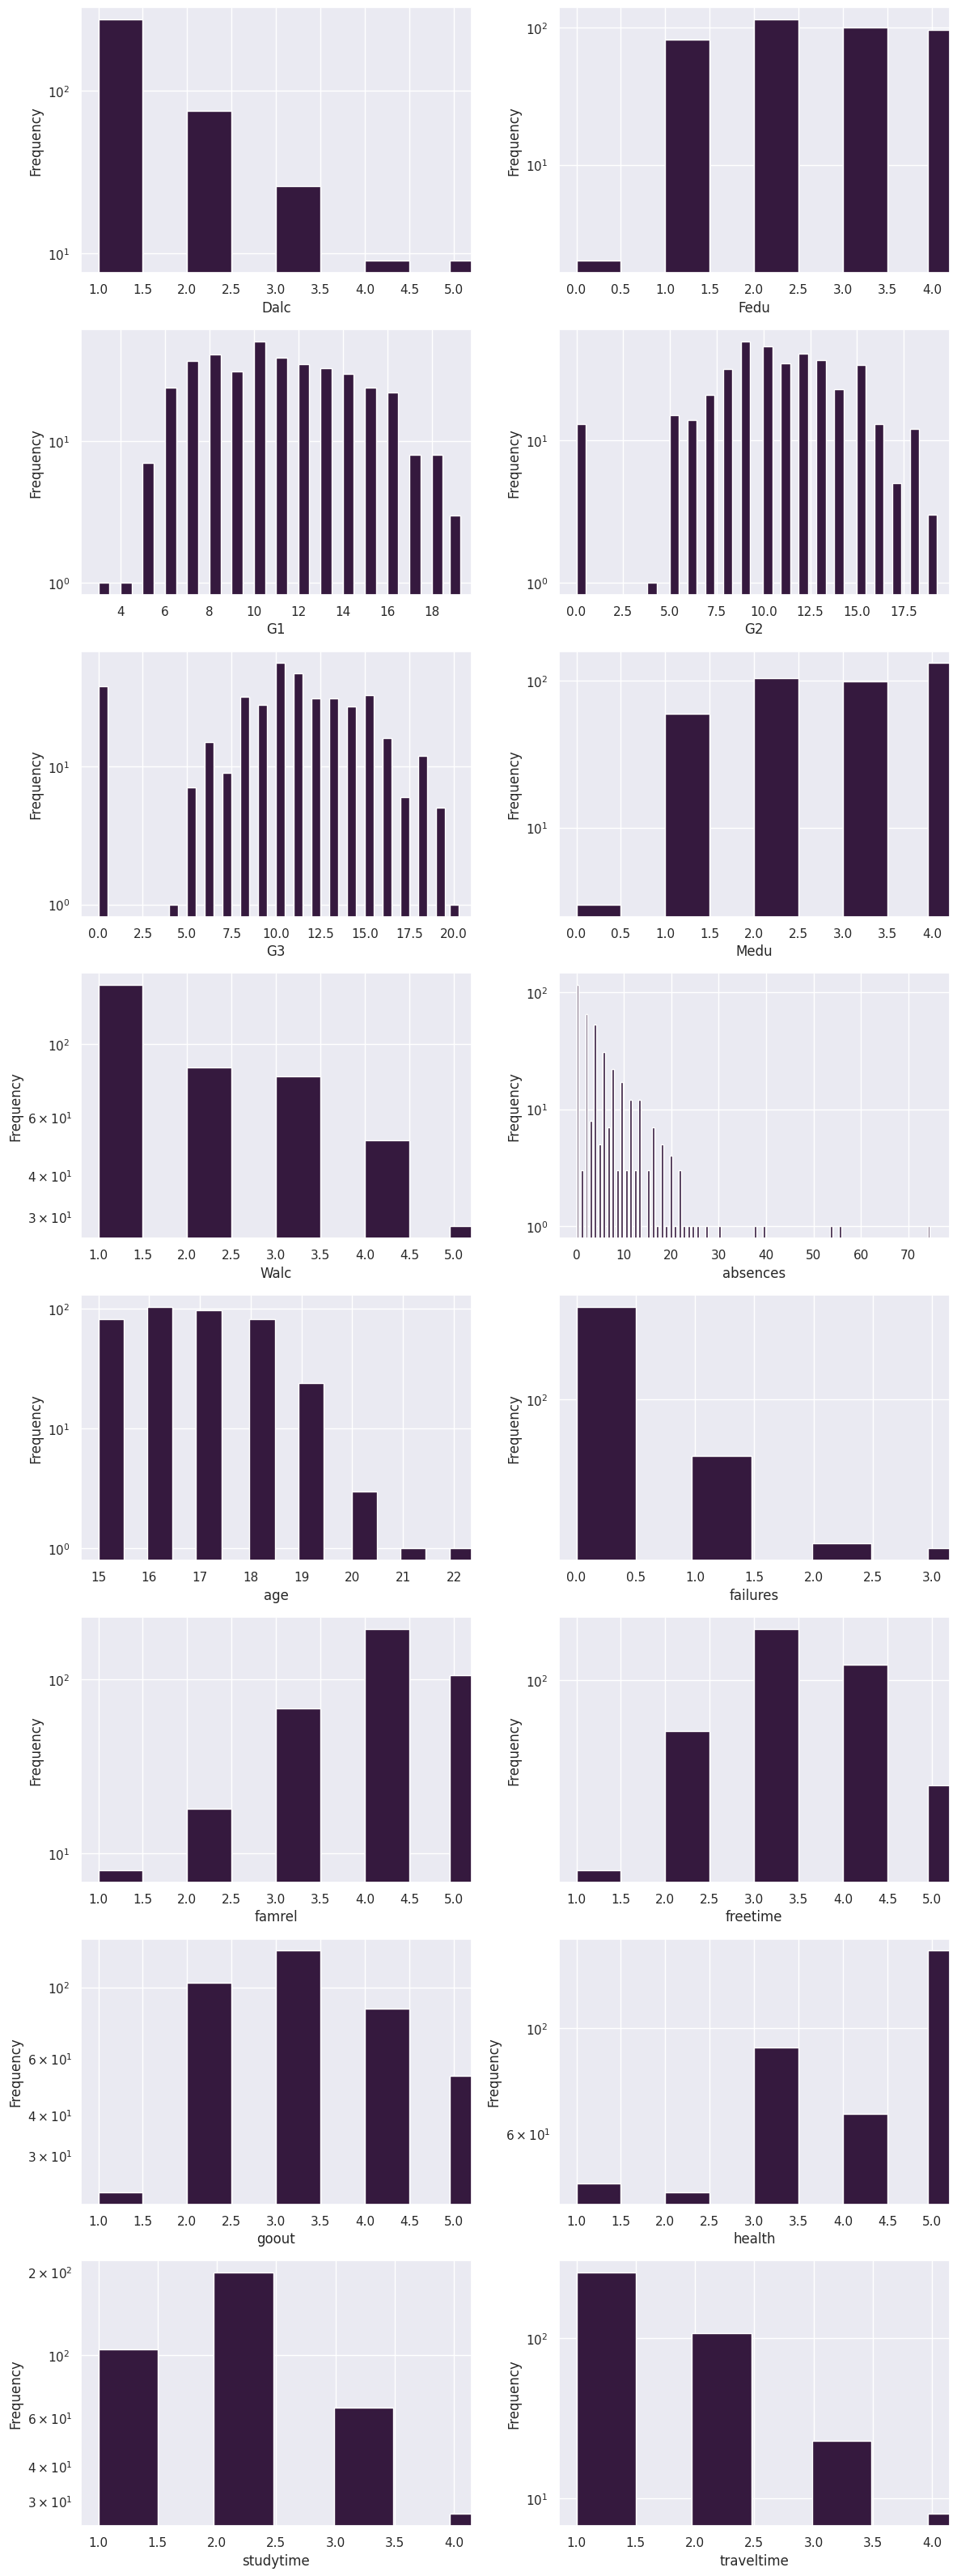

In [14]:
import math

num_of_rows = math.ceil(len(cols_numerical) / 2)
fig, axarr = plt.subplots(ncols=2, nrows=num_of_rows, figsize=(12, 4 * num_of_rows))
for i, col in enumerate(cols_numerical):
    ax = axarr[i // 2, i % 2] # represents one subplot in the grid.
    #  i // 2 and i % 2 expressions are used to calculate the row and column index of the subplot for the current column.
    df[col].plot.hist(ax=ax, bins=80, logy=True, xlabel=col, grid=True , width = 0.5)
fig.tight_layout() # to ensure that all of the subplots are properly spaced.

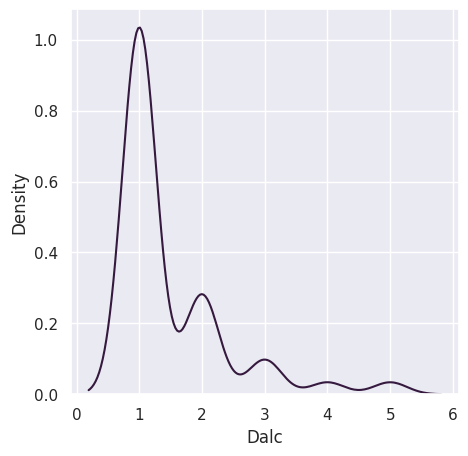

Dalc 
 Dalc
1    276
2     75
3     26
5      9
4      9
Name: count, dtype: int64


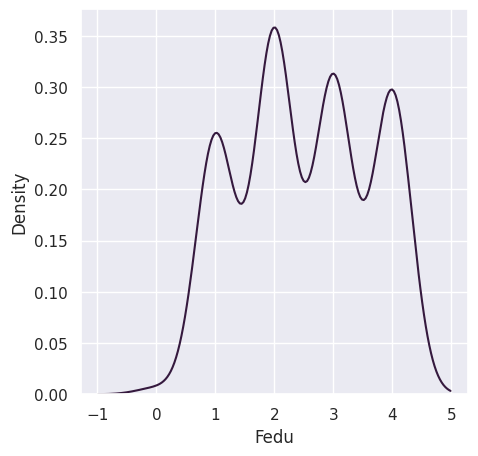

Fedu 
 Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64


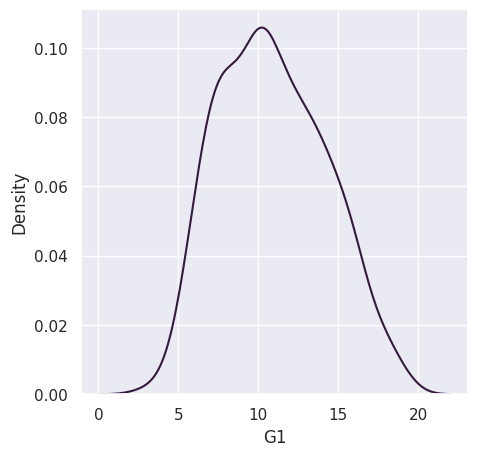

G1 
 G1
10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
18     8
17     8
5      7
19     3
4      1
3      1
Name: count, dtype: int64


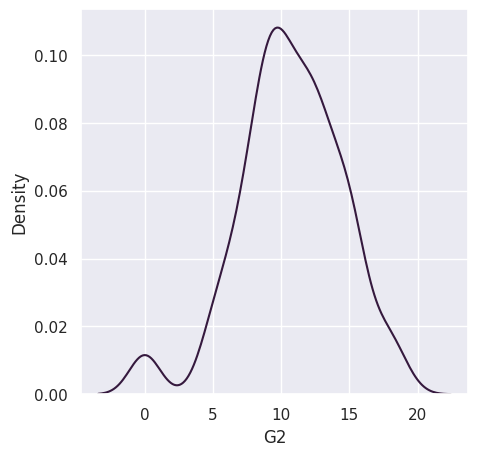

G2 
 G2
9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
16    13
0     13
18    12
17     5
19     3
4      1
Name: count, dtype: int64


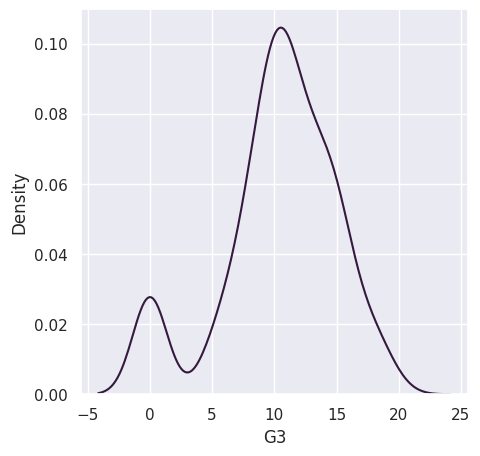

G3 
 G3
10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: count, dtype: int64


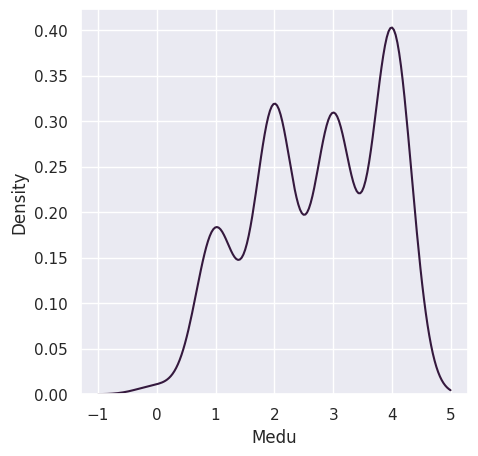

Medu 
 Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64


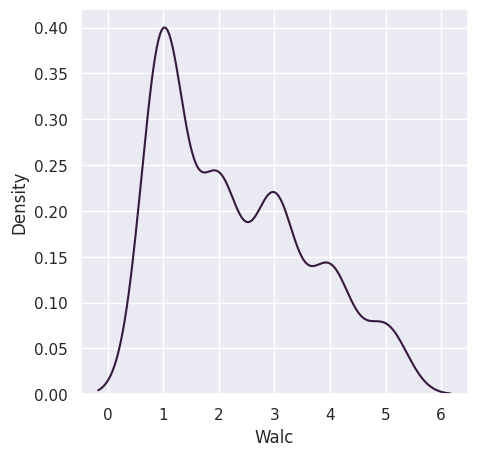

Walc 
 Walc
1    151
2     85
3     80
4     51
5     28
Name: count, dtype: int64


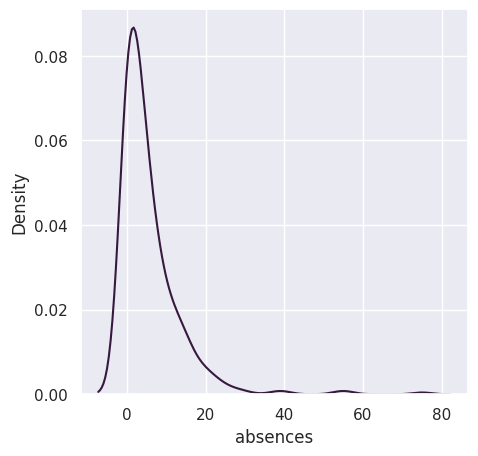

absences 
 absences
0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: count, dtype: int64


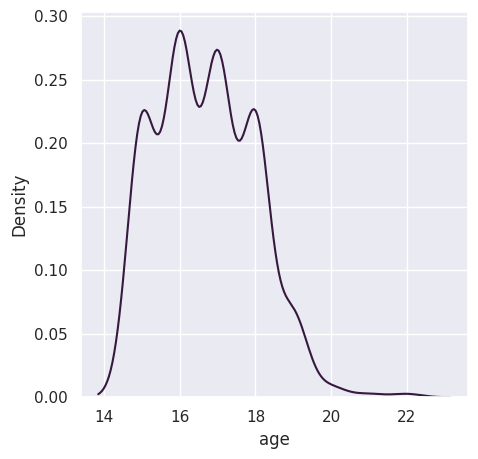

age 
 age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64


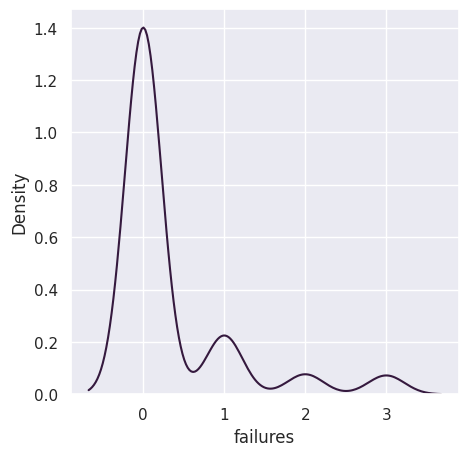

failures 
 failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64


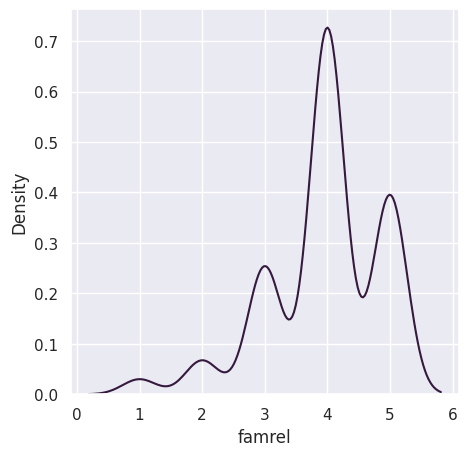

famrel 
 famrel
4    195
5    106
3     68
2     18
1      8
Name: count, dtype: int64


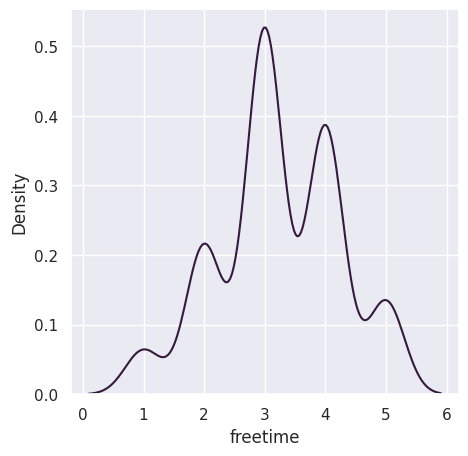

freetime 
 freetime
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64


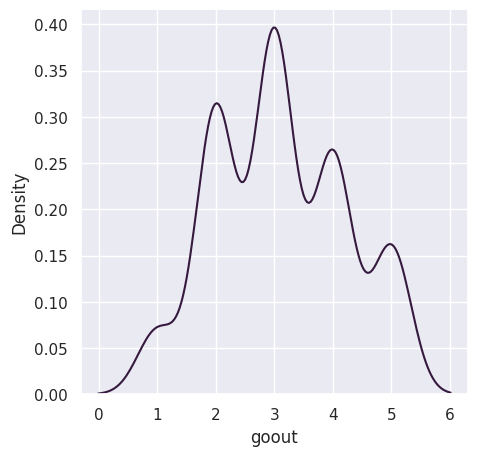

goout 
 goout
3    130
2    103
4     86
5     53
1     23
Name: count, dtype: int64


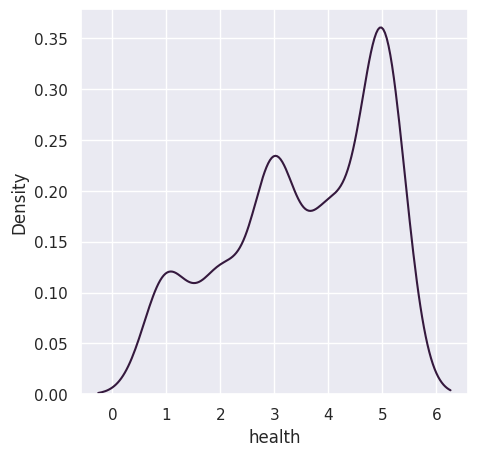

health 
 health
5    146
3     91
4     66
1     47
2     45
Name: count, dtype: int64


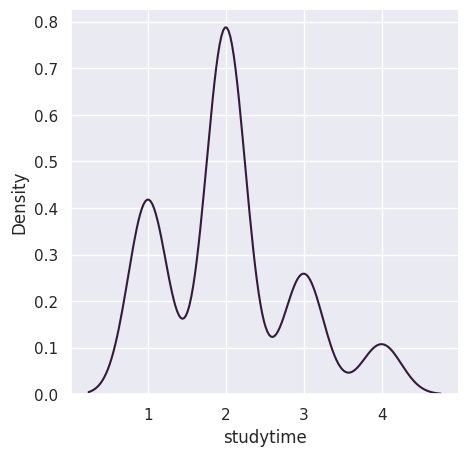

studytime 
 studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64


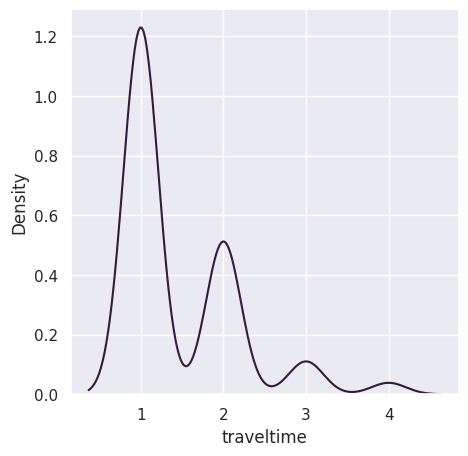

traveltime 
 traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64


In [15]:
def hist_plot(col_2):
        plt.figure(figsize=(5,5))
        sns.kdeplot(data=df, x=col_2)

        plt.show()
        print(col_2,"\n",df[col_2].value_counts())
# Print
for i in cols_numerical:
        hist_plot(i)

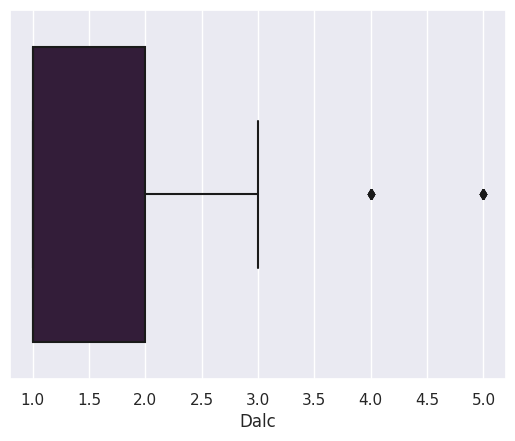

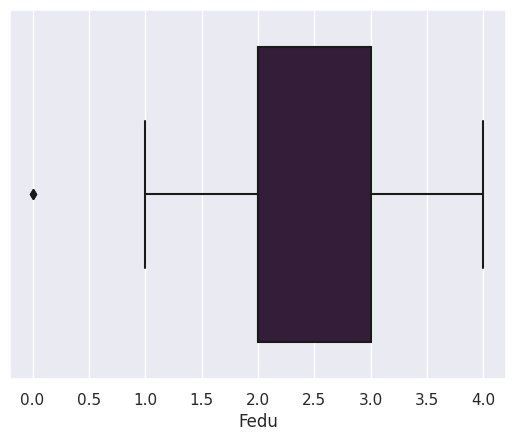

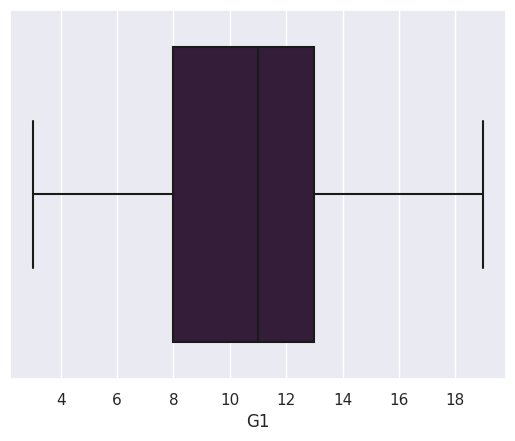

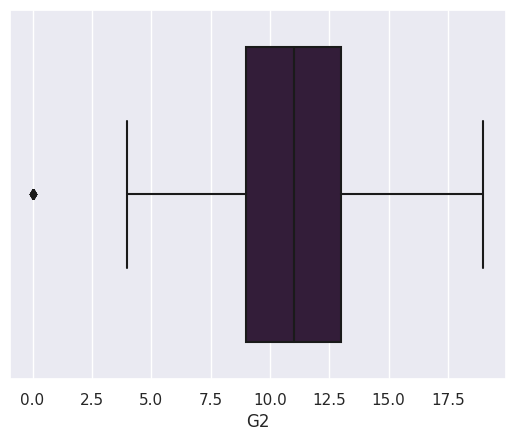

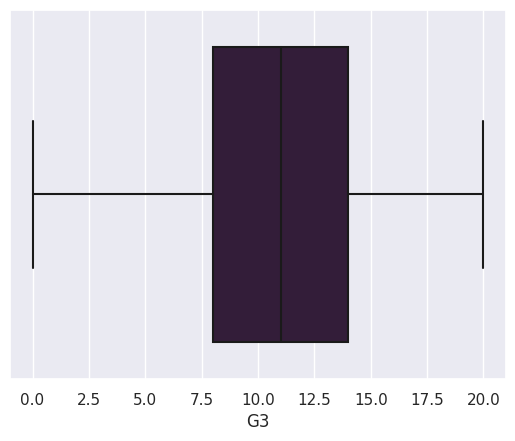

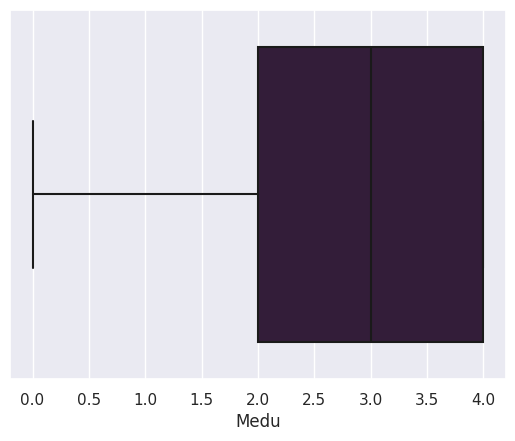

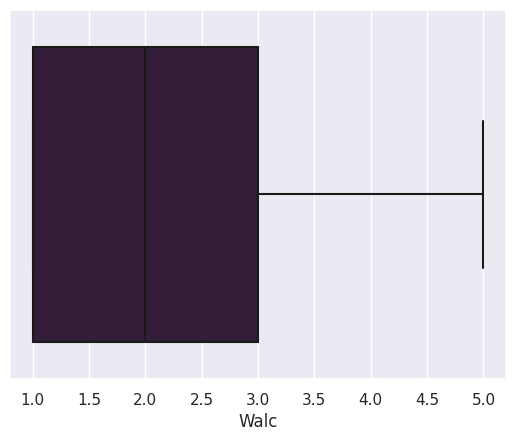

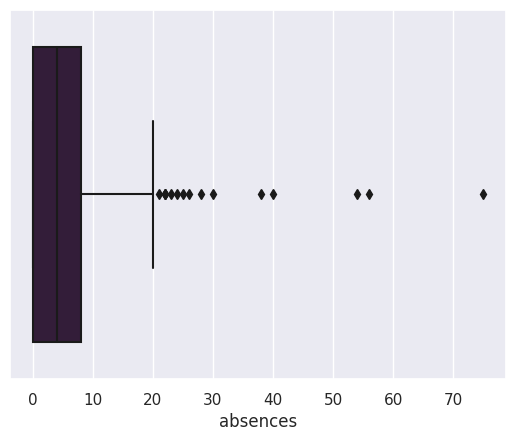

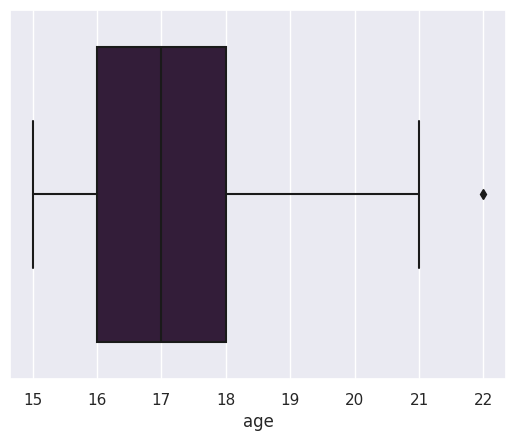

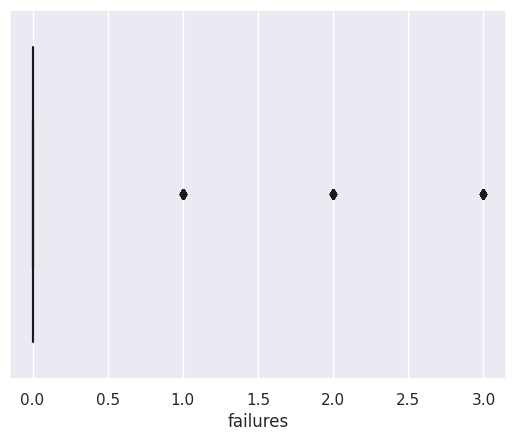

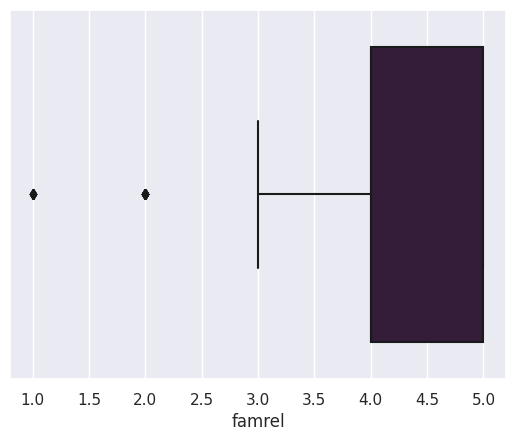

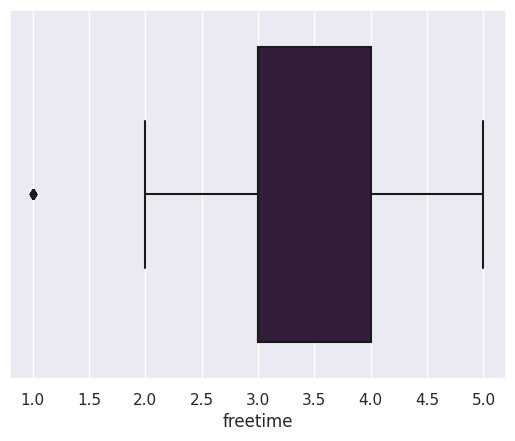

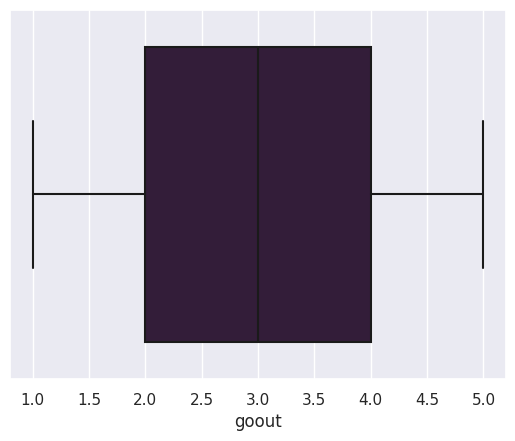

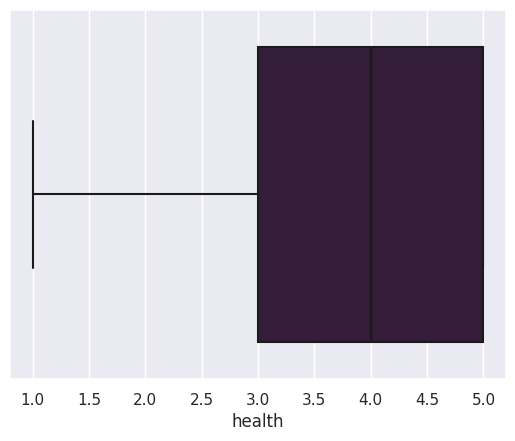

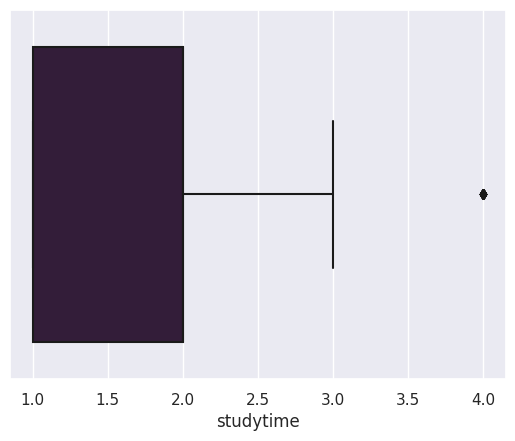

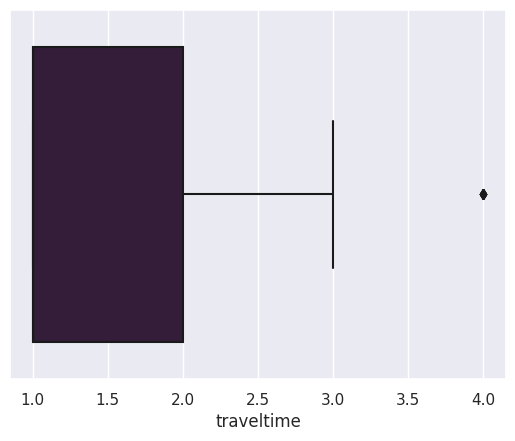

In [16]:
for i in cols_numerical:
    ax=sns.boxplot(x=df[i])
    plt.show()

<Axes: xlabel='G1', ylabel='G2'>

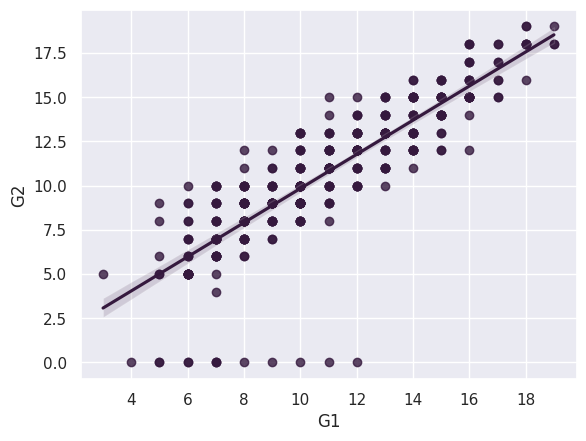

In [17]:
sns.regplot(x="G1", y="G2", data=df)

<Axes: xlabel='G2', ylabel='G3'>

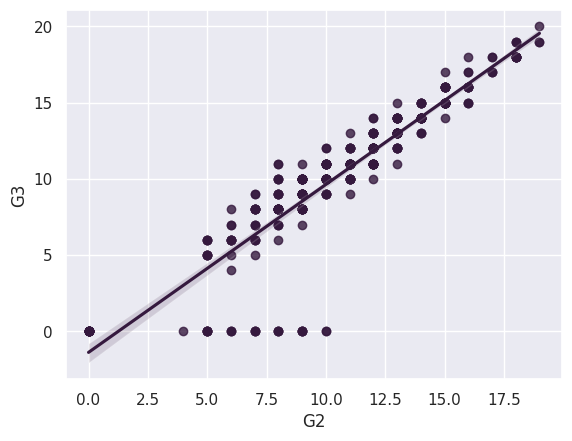

In [18]:
sns.regplot(x="G2", y="G3", data=df)

<Axes: xlabel='G1', ylabel='G3'>

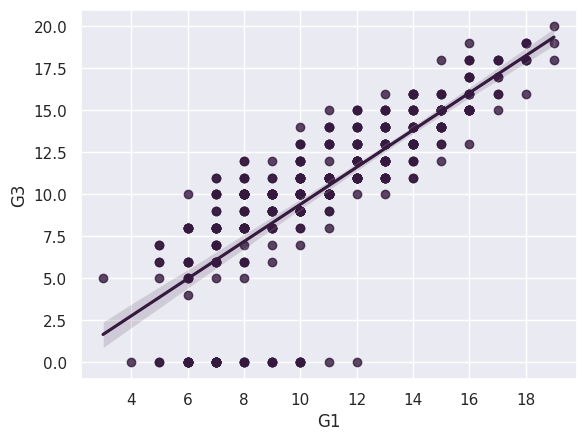

In [19]:
sns.regplot(x="G1", y="G3", data=df)

<Axes: xlabel='Dalc', ylabel='Walc'>

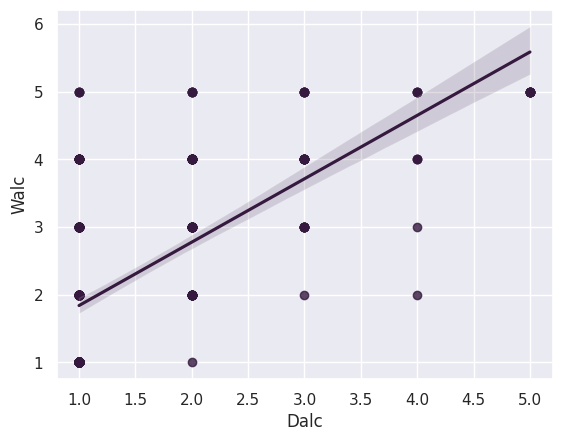

In [20]:
sns.regplot(x="Dalc",y="Walc",data=df)

In [21]:
df['Overall Health'] = (0.5 * df['Dalc'] + 0.5 * df['Walc'] + 2 * df['health'] + df['famrel']) / 4
df['Overall Health']

0      2.750
1      3.000
2      3.125
3      3.500
4      3.875
       ...  
390    4.375
391    2.375
392    3.500
393    4.375
394    4.000
Name: Overall Health, Length: 395, dtype: float64

# Overall Health vs. Grade

[Text(0.5, 1.0, 'Overall Health vs. Grade')]

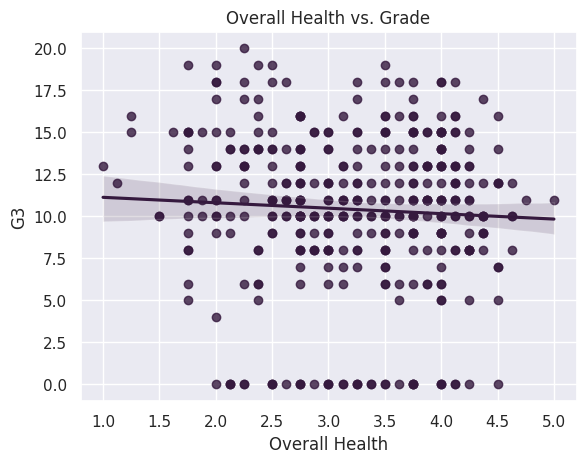

In [22]:
sns.regplot(x='Overall Health', y='G3', data=df).set(title = 'Overall Health vs. Grade')

### Observations

* In general better overall health value corresponds to a lower final grade. Conversely, a lower overall health value generally corresponds to a higher final grade.
* The slope of the best fit line is a small distance away from zero, so the correlation between Overall Health and G3 is low.

We can explore the latter observation further by organising the plots based on the presence or absence of certain attributes

# Absences vs. Grade

[Text(0.5, 1.0, 'Absences vs G3')]

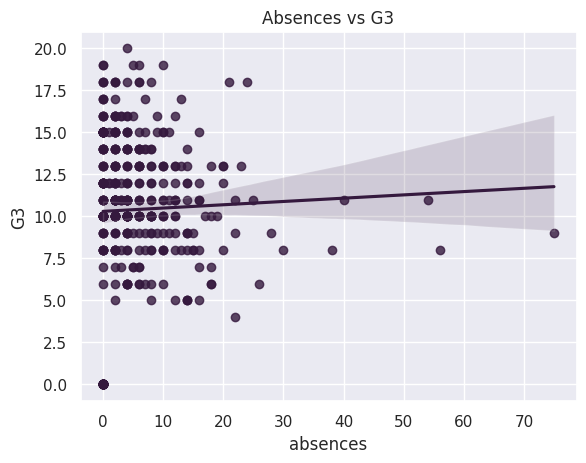

In [23]:
sns.regplot(x='absences', y='G3', data=df).set(title='Absences vs G3')

There seems to be no correlation between Absences and G3 and this is interesting we need to identify the potential cause for this phenomenon, and we need to examine more relationships on Absences to determine the cause.

[Text(0.5, 1.0, 'Absences vs G1')]

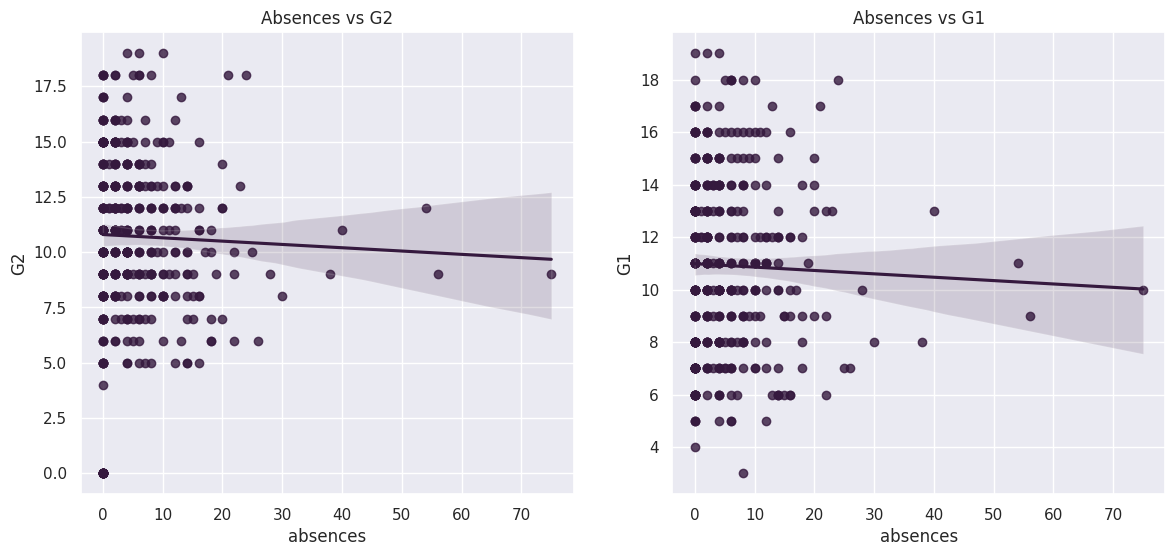

In [24]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.regplot(x='absences', y='G2', data=df, ax=axes[0])
axes[0].set(title='Absences vs G2')

sns.regplot(x='absences', y='G1', data=df, ax=axes[1])
axes[1].set(title='Absences vs G1')

This low correlation is because absent students (usually) revise the material missed, effectively accounting for their absence.

For a further explanation, we need to plot the correlation matrix to validate our hypothesis.

<Axes: >

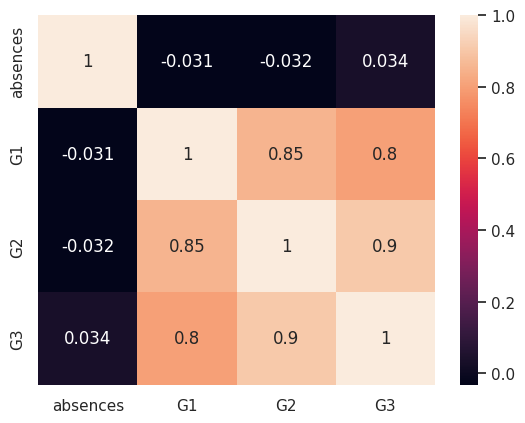

In [25]:
sns.heatmap(df[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)

### Conclusion
* The number of absences a student has does not necessarily result in a lower grade overall, as absent students typically make up the material they missed, effectively accounting for their absence.

# Age vs. Grade

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


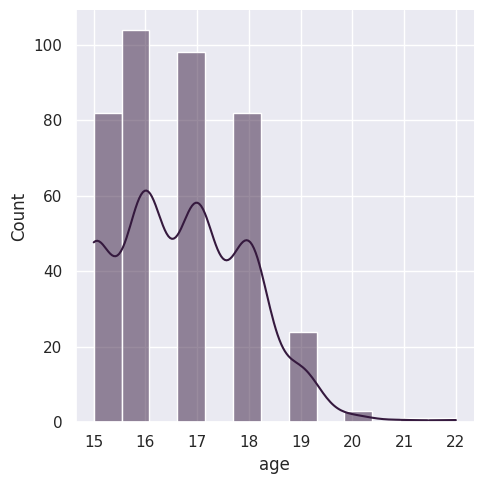

In [26]:
sns.displot(x='age', data=df, kind='hist', kde=True)

In [27]:
age_grade = df.groupby("age").aggregate({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace=True)
age_grade

,age,G1,G2,G3
0,15,11.231707,11.365854,11.256098
1,16,10.942308,11.182692,11.028846
2,17,10.897959,10.479592,10.275510
3,18,10.719512,10.134146,9.548780
4,19,10.250000,9.250000,8.208333
5,20,13.666667,13.666667,14.000000
6,21,10.000000,8.000000,7.000000
7,22,6.000000,8.000000,8.000000


There's an inverse relationship between  age and Grads

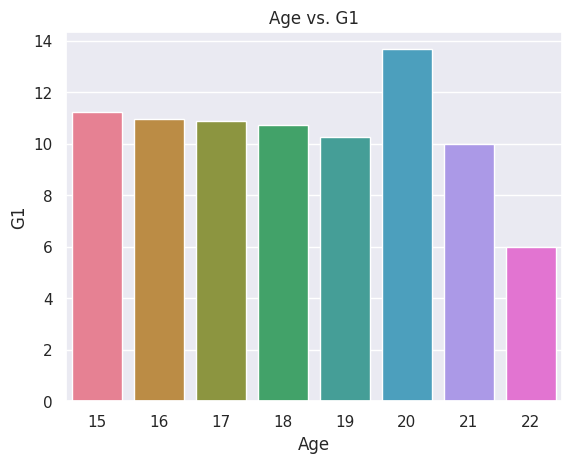

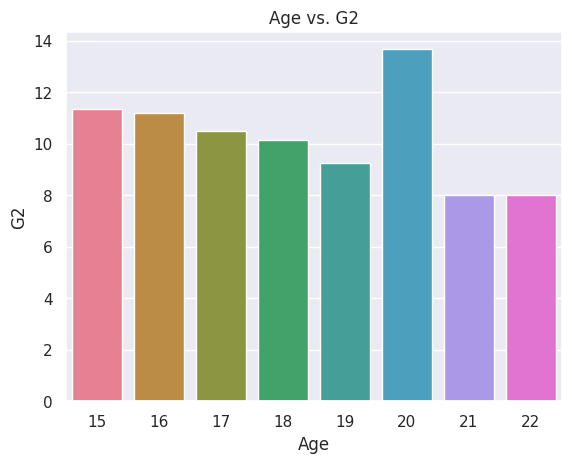

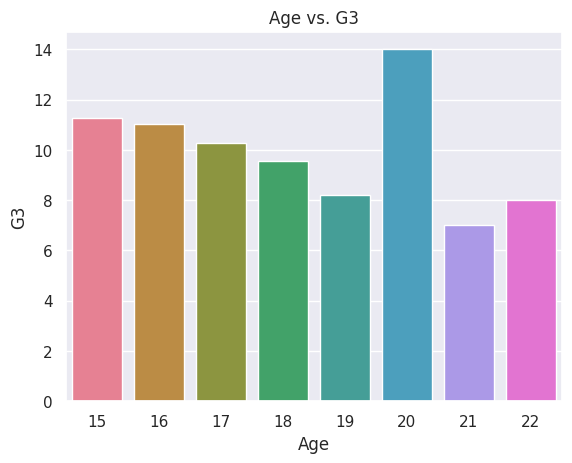

In [28]:
grades = ['G1', 'G2', 'G3']

for grade in grades:
    sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}');
    plt.show();

### Conclusion
* The older a person is, the lower the grades they receive are; however, twenty-year-olds (in this dataset) exhibit an outstanding performance: they lead by at least 2 whole grade points on a 19-point scale.
* At the moment, we cannot make any substantiated claims as to why such a drastic increase occurs.

# Time Productivity vs. Grade

<Axes: xlabel='Time Productivity', ylabel='G3'>

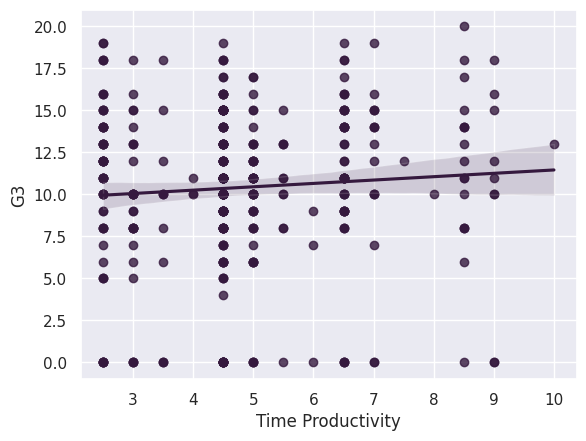

In [29]:
df['Time Productivity'] = 0.5 * df['traveltime'] + 2 * df['studytime']
sns.regplot(x='Time Productivity', y='G3', data=df)

As expected, students with a greater time productivity have better grades.

<Axes: xlabel='studytime', ylabel='G3'>

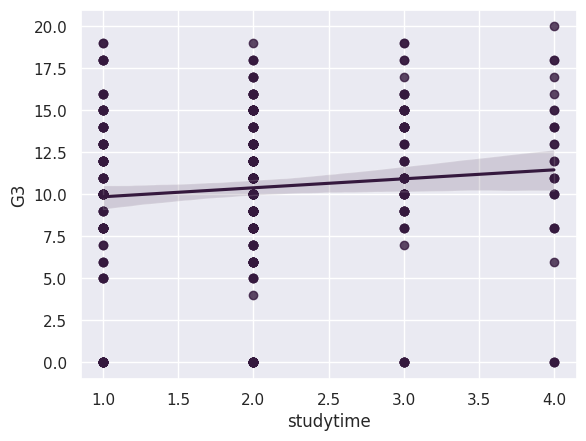

In [30]:
sns.regplot(x='studytime', y='G3', data=df)

<Axes: xlabel='traveltime', ylabel='G3'>

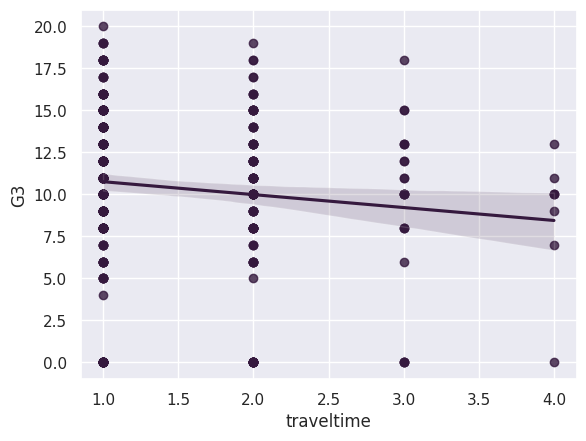

In [31]:
sns.regplot(x='traveltime', y='G3', data=df)

Another batch of expected results. Students who study more score better on tests and quizzes. In contrast, students who travel more perform worse on tests and quizzes.

### Conclusion
* This section confirmed the obvious: students who study more receive better grades whereas students who travel more or study less receive lower grades.

# Mothers' Job and Education

In [32]:
MotherJop_Edu = df.groupby("Mjob").aggregate({"Medu": "mean"})
MotherJop_Edu.reset_index(inplace=True)
MotherJop_Edu.sort_values(by='Medu', ascending=False, inplace=True)

In [33]:
MotherJop_Edu

,Mjob,Medu
4,teacher,3.948276
1,health,3.647059
3,services,2.844660
2,other,2.404255
0,at_home,1.711864


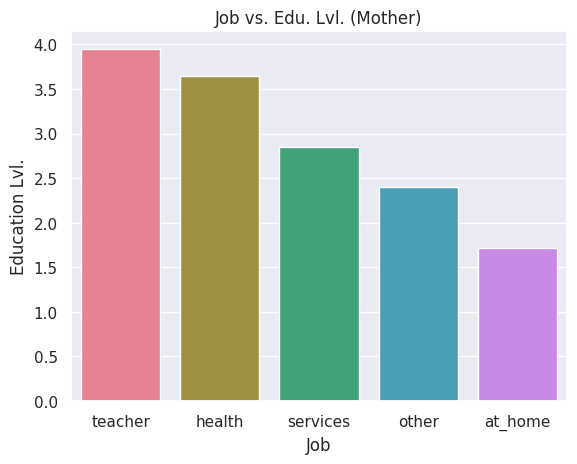

In [34]:
sns.barplot(x='Mjob', y='Medu', data=MotherJop_Edu , palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)');

* teachers and health care professionals need to have a high education level in order to acquire a job in the industry, and conversely with at home mother.

# Fathers' Job and Education

In [35]:
FatherJop_Edu = df.groupby("Fjob").aggregate({"Fedu": "mean"})
FatherJop_Edu.reset_index(inplace=True)
FatherJop_Edu.sort_values(by='Fedu', ascending=False, inplace=True)

In [36]:
FatherJop_Edu

,Fjob,Fedu
4,teacher,3.862069
1,health,3.333333
3,services,2.558559
0,at_home,2.350000
2,other,2.271889


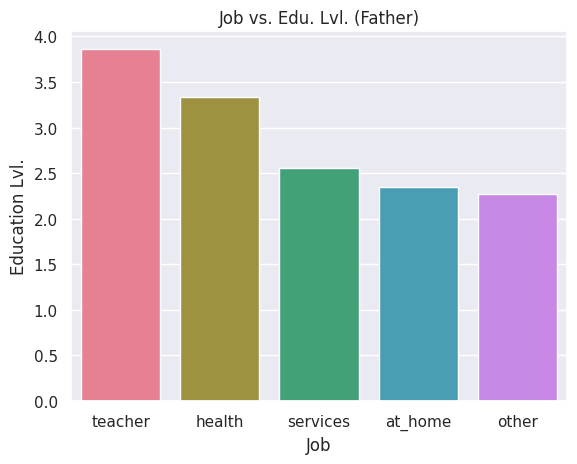

In [37]:
sns.barplot(x='Fjob', y='Fedu', data=FatherJop_Edu ,palette='husl').set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)');

The graph for the father yields about the same results as the graph for the mother. However, there is one interesting finding: at-home fathers have a higher education level than at-home mothers.

### Conclusion
* This mini-exploration yielded reasonable results. Teachers and health care professionals had a higher education level while at-home parents tended to reside at the lower end of the education level spectrum.

# Job vs. Grade

### 1. Mothers' Job

In [38]:
MotherJop_Grade = df.groupby('Mjob').aggregate({'G3':'mean'}).reset_index()
MotherJop_Grade

,Mjob,G3
0,at_home,9.152542
1,health,12.147059
2,other,9.822695
3,services,11.019417
4,teacher,11.051724


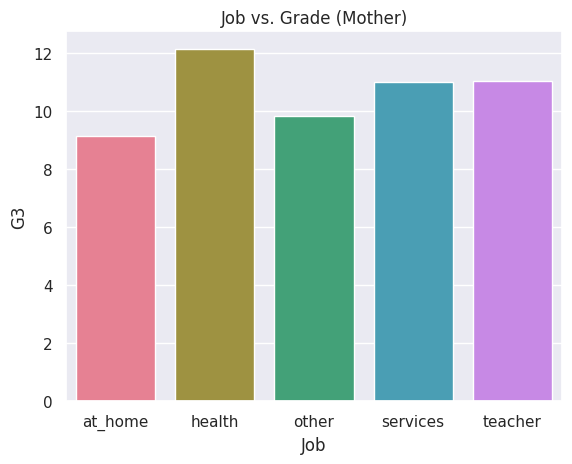

In [39]:
sns.barplot(x = 'Mjob' , y='G3' , palette='husl' , data = MotherJop_Grade).set(xlabel='Job', ylabel='G3', title='Job vs. Grade (Mother)');

Surprisingly, students with mothers who are health care professionals receive a higher grade on average. I expected students with mothers who were teachers to score the highest

### 2. Fathers' Job

In [40]:
FatherJop_Grade = df.groupby('Fjob').aggregate({'G3':'mean'}).reset_index()
FatherJop_Grade

,Fjob,G3
0,at_home,10.150000
1,health,11.611111
2,other,10.193548
3,services,10.297297
4,teacher,11.965517


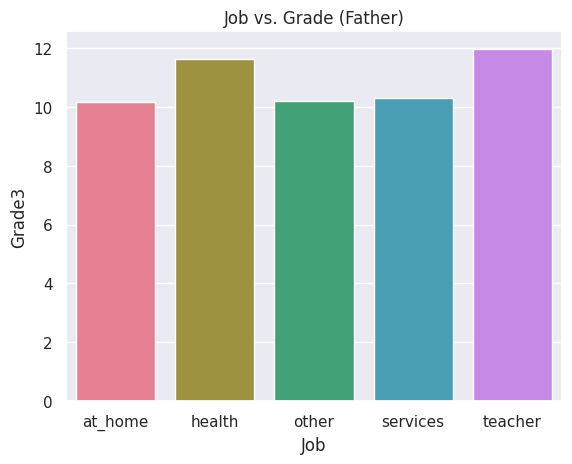

In [41]:
sns.barplot(x='Fjob', y='G3', data=FatherJop_Grade , palette='husl').set(xlabel='Job', ylabel='Grade3', title='Job vs. Grade (Father)');

```text
These results are more reasonable than the previous set. Notice that the order of these results corresponds with the order of the father's education level.
In other words, fathers with higher education levels tend to increase their children's performance more than fathers with lower education levels.
The father directly passes down his knowledge, thus cultivating the student's knowledge.
```


### Conclusion
* This exploration uncovered the slightly surprising relationship between the Mother's Job and the student's grade. We discovered that mothers who work in the health industry have        children who receive higher scores on average than mothers who work in other fields.

* In contrast, for fathers, we observed a relationship one might expect. Fathers with higher educational levels directly passed on that knowledge to the student, eventually improving the student's overall test scores.

# Family Size vs. Grade

In [42]:
Family_size_grade = df.groupby("famsize").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
Family_size_grade

,famsize,G1,G2,G3
0,GT3,10.758007,10.519573,10.177936
1,LE3,11.280702,11.192982,11.000000


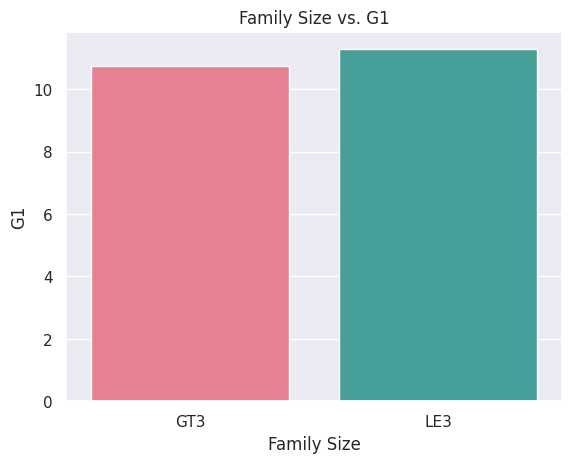

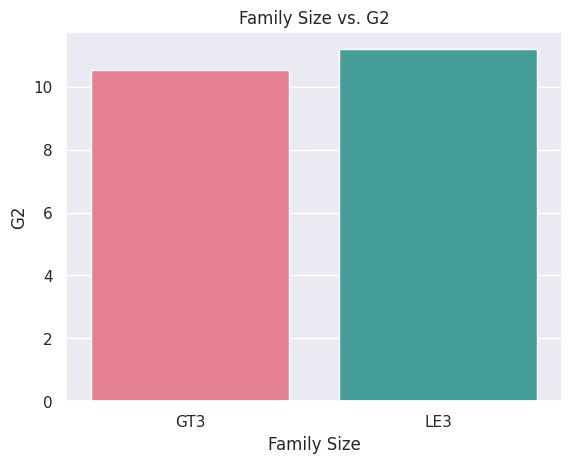

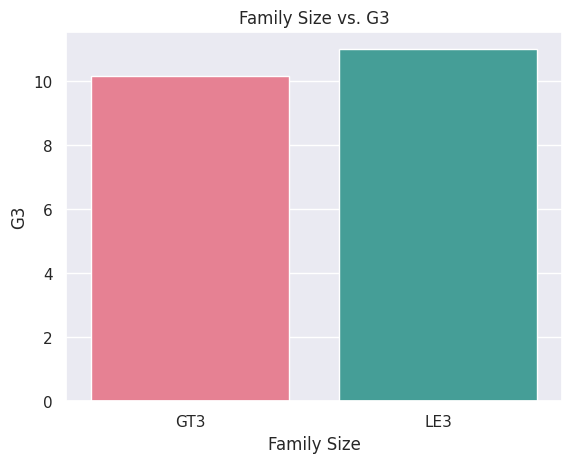

In [43]:
for grade in grades:
    sns.barplot(data=Family_size_grade, x='famsize', y=grade, palette='husl').set(xlabel='Family Size', ylabel=grade, title=f'Family Size vs. {grade}');
    plt.show();

### Conclusion
* As the barplots show, children with no siblings tend to score slightly - indeed, very slightly - higher than students with siblings

# Activites vs. Grade
This section explores the relationship between the amount of social interaction a person undergoes and how said person scores on an exam.

In [44]:
act_gr = df.groupby("activities").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
act_gr

,activities,G1,G2,G3
0,no,10.716495,10.520619,10.340206
1,yes,11.094527,10.900498,10.487562


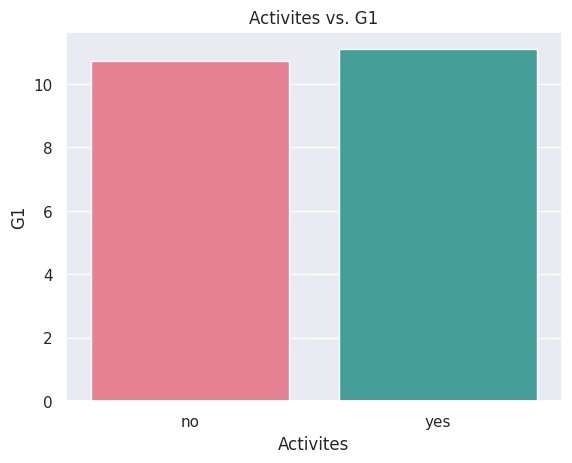

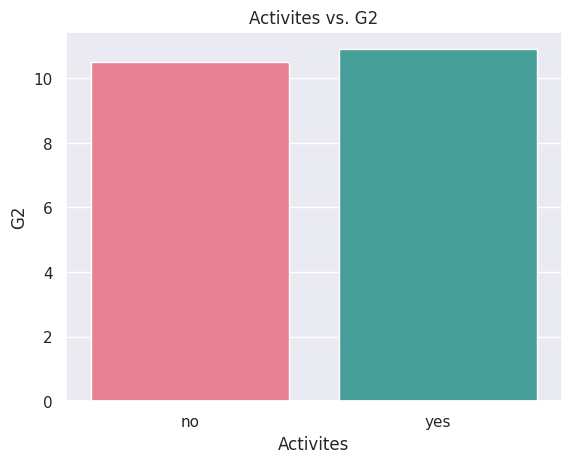

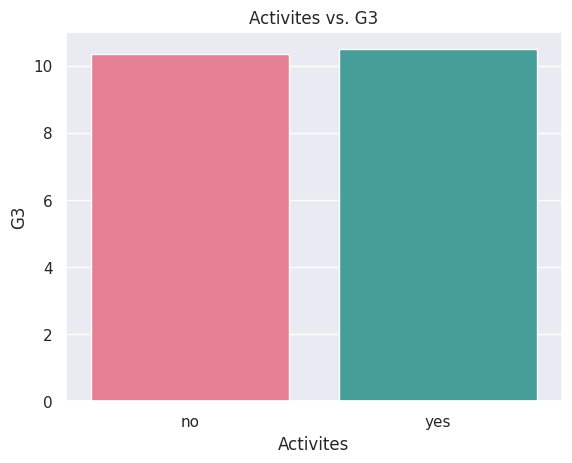

In [45]:
for grade in grades:
    sns.barplot(data=act_gr, x='activities', y=grade, palette='husl').set(xlabel='Activites', ylabel=grade, title=f'Activites vs. {grade}');
    plt.show();

People with activites receive marginally higher grades on average.

# Go out vs Grades

In [46]:
out_gr = df.groupby("goout").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
out_gr

,goout,G1,G2,G3
0,1,11.130435,10.782609,9.869565
1,2,11.368932,11.456311,11.194175
2,3,11.276923,11.053846,10.961538
3,4,10.430233,10.058140,9.651163
4,5,9.792453,9.471698,9.037736


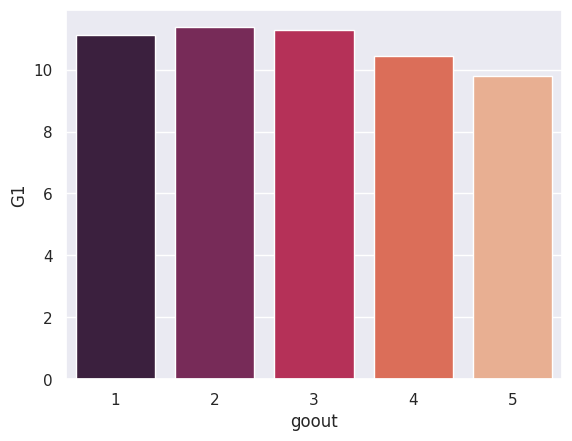

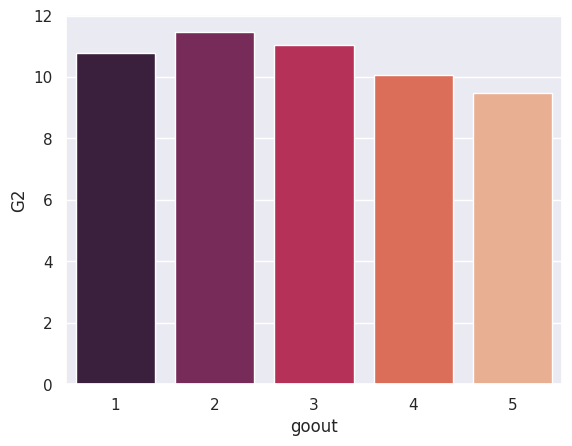

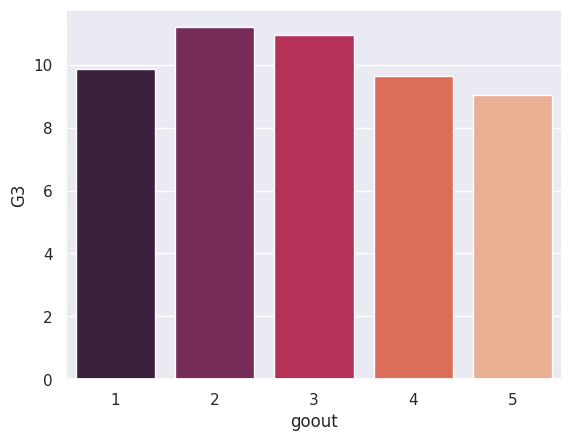

In [47]:
for grade in grades:
    sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')
    plt.show()

Overall, going out more results in an short-lived increase followed by a steep decrease in test scores.

# Conclusion
* This section portrayed a surprising relationship between how often a student engages in social activity. Students with social activity, in general, scored better than students without socialization.

* On the contrary, students who went out more often tended to score on the lower side of the grade spectrum; the perfect rating in goout was 2, as it resulted in the highest average score for all scoring metrics.

# Data Pre-Processing
Introduction
This involves a number of activities such as:

* Assigning numerical values to categorical data;
* Handling missing values; 
* Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

Goal:
* Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model.

In [48]:
# I already have two lists that have categorical and numerical data but this is other way more easy than last one to get this lists 
#list of columns that are categorical
categorical_col = df.select_dtypes(include=['object']).columns.tolist()
#list of columns that are numerical
numerical_col = df.select_dtypes(include=['number']).columns.tolist()
categorical_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

### Label encoding
Here, I assign the 32 features to a NumPy array X and encoded the original string representation on the categorical columns into integers to start the machine learning phase.

In [50]:
new_df = pd.get_dummies(df, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet',
 'romantic'])

In [51]:
new_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


In [52]:
X = new_df.drop('G3', axis=1).values
y = new_df['G3'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((276, 60), (276,), (119, 60), (119,))

In [54]:
X_test

array([[17, 2, 1, ..., True, True, False],
       [18, 1, 2, ..., True, False, True],
       [18, 3, 3, ..., True, False, True],
       ...,
       [18, 3, 2, ..., True, True, False],
       [17, 2, 3, ..., False, True, False],
       [16, 4, 4, ..., True, False, True]], dtype=object)

In [55]:
# Scaling the data using pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_test

array([[ 0.21668659, -0.69162477, -1.41883525, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.99338138, -1.62735241, -0.47975005, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       [ 0.99338138,  0.24410286,  0.45933515, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       ...,
       [ 0.99338138,  0.24410286, -0.47975005, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.21668659, -0.69162477,  0.45933515, ..., -2.32778965,
         0.72447352, -0.72447352],
       [-0.5600082 ,  1.1798305 ,  1.39842035, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ]])

# Modling

In [56]:
# initializing the algorithm
lin_reg = LinearRegression()

# Fitting Simple Linear Regression to the Training set
lin_reg.fit(X_train,y_train)

LinearRegression()

In [57]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [58]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 1.5262626075210732
MSE: 4.980629240543842
RMSE: 2.23173234070393
R2 Square 0.7734230337329375
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.1460872157302693
MSE: 2.707676072351399
RMSE: 1.6455017691729774
R2 Square 0.8677892136016778
__________________________________


In [59]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.781475


In [60]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor( max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.2539003597283218
MSE: 4.878941757632711
RMSE: 2.208832668545246
R2 Square 0.7780489635648119
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0262691794060728
MSE: 3.7821469579486697
RMSE: 1.9447742691501937
R2 Square 0.8153247987488508
__________________________________


In [61]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.merge(results_df , results_df_2 , how='outer')

In [62]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.781475
1,Robust Regression,1.253900,4.878942,2.208833,0.778049,0.786863


In [63]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.4522504909931255
MSE: 5.16325024507317
RMSE: 2.272278646001227
R2 Square 0.765115305696072
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.2824393324612604
MSE: 3.558000976995604
RMSE: 1.886266411988403
R2 Square 0.8262694300924712
__________________________________


In [64]:
results_df_3 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

results_df = pd.merge(results_df , results_df_3 , how='outer')

In [65]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.781475
1,Robust Regression,1.253900,4.878942,2.208833,0.778049,0.786863
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.783390


In [66]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.3155797011423986
MSE: 4.381198529690546
RMSE: 2.093131273879053
R2 Square 0.8006921166927481
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0641794595238838
MSE: 3.0275618977970913
RMSE: 1.73998905105667
R2 Square 0.8521697837253691
__________________________________


In [67]:
results_df_4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.merge(results_df , results_df_4 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.781475
1,Robust Regression,1.253900,4.878942,2.208833,0.778049,0.786863
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.783390
3,Lasso Regression,1.315580,4.381199,2.093131,0.800692,0.814576


In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.3775142924979242
MSE: 19.76679345793374
RMSE: 4.445986218819593
R2 Square 0.10077625170967175
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0066022089934753e-14
MSE: 1.6527207602717314e-28
RMSE: 1.2855818761447019e-14
R2 Square 1.0
__________________________________


In [69]:
results_df_5 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.merge(results_df , results_df_5 , how='outer')
results_df

/tmp/ipykernel_20/3181958154.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_5 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.781475
1,Robust Regression,1.253900,4.878942,2.208833,0.778049,0.786863
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.783390
3,Lasso Regression,1.315580,4.381199,2.093131,0.800692,0.814576
4,Polynomail Regression,3.377514,19.766793,4.445986,0.100776,0.000000


In [70]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.9058308216939344
MSE: 5.916627152535003
RMSE: 2.4324117974831077
R2 Square 0.7308429585880336
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.4404367076019833
MSE: 3.5043212983385303
RMSE: 1.871983252686447
R2 Square 0.8288905089583407
__________________________________


In [71]:

results_df_6 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.merge(results_df , results_df_6 , how='outer')
results_df

/tmp/ipykernel_20/3961607680.py:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_6 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.781475
1,Robust Regression,1.253900,4.878942,2.208833,0.778049,0.786863
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.783390
3,Lasso Regression,1.315580,4.381199,2.093131,0.800692,0.814576
4,Polynomail Regression,3.377514,19.766793,4.445986,0.100776,0.000000
5,Stochastic Gradient Descent,1.905831,5.916627,2.432412,0.730843,0.000000


In [72]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_6 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])


Test set evaluation:
_____________________________________
MAE: 1.0809411764705883
MSE: 3.2274507731092434
RMSE: 1.796510721679457
R2 Square 0.8531779882359745
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.35433695652173913
MSE: 0.3218229528985507
RMSE: 0.5672944146548163
R2 Square 0.9842859837931803
__________________________________


In [73]:
results_df = pd.merge(results_df , results_df_6 , how='outer')
results_df

/tmp/ipykernel_20/1856174570.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_6 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.781475
1,Robust Regression,1.253900,4.878942,2.208833,0.778049,0.786863
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.783390
3,Lasso Regression,1.315580,4.381199,2.093131,0.800692,0.814576
4,Polynomail Regression,3.377514,19.766793,4.445986,0.100776,0.000000
5,Stochastic Gradient Descent,1.905831,5.916627,2.432412,0.730843,0.000000
6,Random Forest Regressor,1.080941,3.227451,1.796511,0.853178,0.000000


In [74]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_7 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 1.8010554697462262
MSE: 6.494649693143751
RMSE: 2.548460259282799
R2 Square 0.7045477682897874
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010538717182897192
MSE: 1.1678456450932852e-06
RMSE: 0.0010806690728864619
R2 Square 0.9999999429762693
__________________________________


In [75]:
results_df = pd.merge(results_df , results_df_7 , how='outer')
results_df

/tmp/ipykernel_20/2738876734.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_7 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.781475
1,Robust Regression,1.253900,4.878942,2.208833,0.778049,0.786863
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.783390
3,Lasso Regression,1.315580,4.381199,2.093131,0.800692,0.814576
4,Polynomail Regression,3.377514,19.766793,4.445986,0.100776,0.000000
5,Stochastic Gradient Descent,1.905831,5.916627,2.432412,0.730843,0.000000
6,Random Forest Regressor,1.080941,3.227451,1.796511,0.853178,0.000000
7,SVM Regressor,1.801055,6.494650,2.548460,0.704548,0.000000


Text(0.5, 0, 'R2')

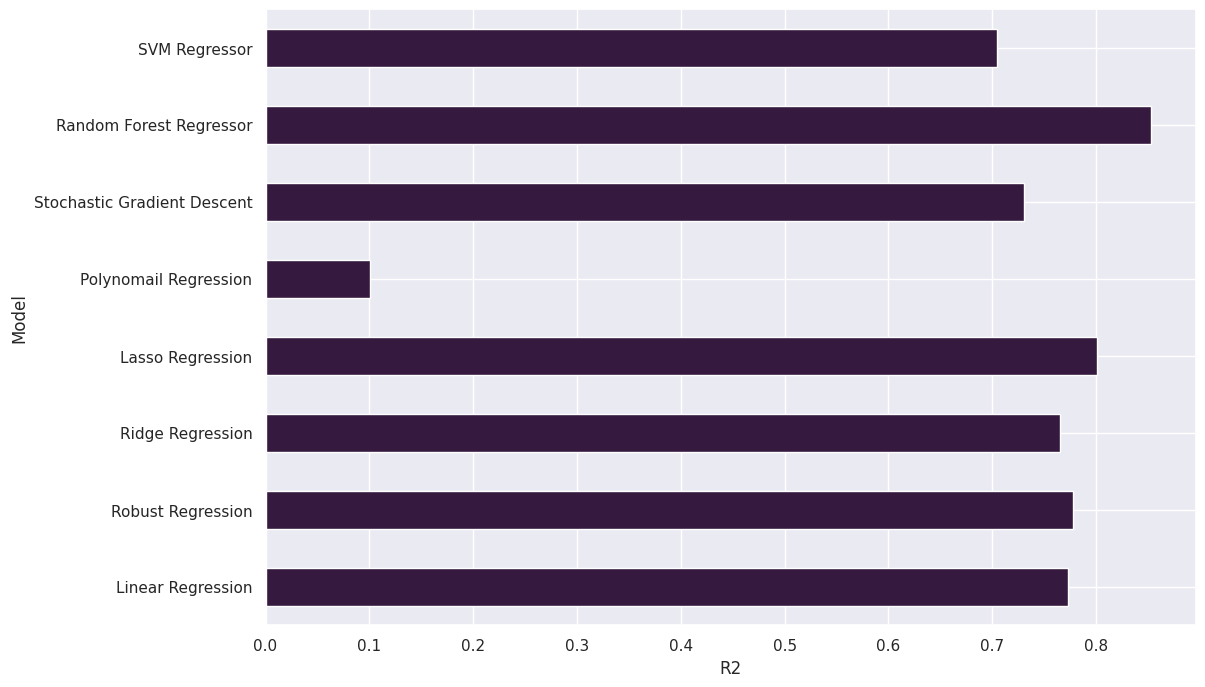

In [76]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))
plt.xlabel('R2')

# Feature Selection

In [77]:
X = new_df.drop('G3', axis=1)
y = new_df['G3']
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,True,False,False,True,False,True,True,False,True,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,True,False,False,True,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,True,False,True,False,False,True,True,False,True,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,True,False,False,True,False,True,True,False


In [78]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [79]:
print(selection.feature_importances_)

[6.51344782e-03 2.78989329e-03 1.62521582e-03 6.27669820e-03
 8.69113236e-03 6.93351634e-03 5.73042827e-03 2.98798420e-03
 4.72085991e-03 1.68795707e-03 3.08906327e-03 4.85839231e-03
 3.87718969e-02 2.30550708e-01 5.85896853e-01 6.80660086e-03
 5.80132869e-03 1.52241829e-03 9.91401969e-04 1.44934301e-03
 1.12253184e-03 6.51657190e-04 6.17295973e-04 9.44665544e-04
 7.63148230e-04 2.53335865e-04 5.12415040e-04 2.05901505e-03
 1.26283112e-03 3.40130125e-03 2.47768649e-03 1.19160824e-03
 3.60840032e-03 6.06667474e-04 2.89587410e-03 4.69636310e-03
 7.10356895e-04 1.86583884e-03 7.48984130e-03 3.88387812e-04
 1.49453880e-03 1.31336411e-03 2.79648170e-03 3.52875365e-03
 1.55902697e-03 1.25111884e-03 1.32835707e-03 1.15005175e-03
 1.00455780e-03 1.31104958e-03 2.66784607e-03 2.23235412e-03
 2.32133978e-03 2.15605124e-03 1.69424371e-03 1.47232352e-03
 7.11325621e-04 9.22569602e-04 1.89021627e-03 1.98006858e-03]


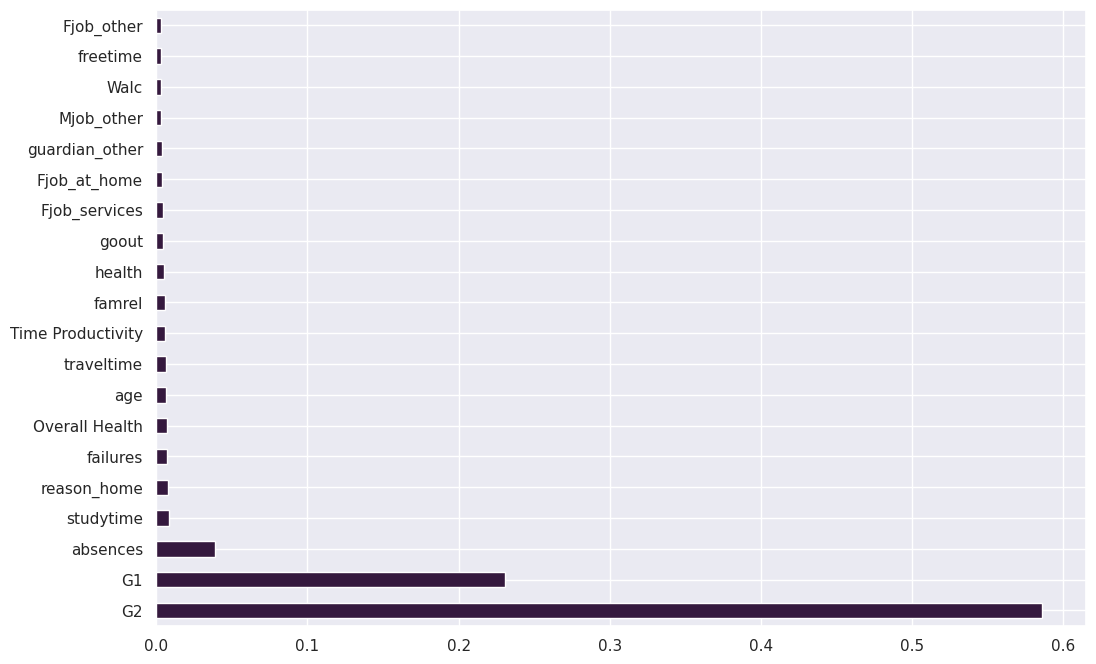

In [80]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [81]:
X = df[['absences', 'G1', 'G2']]
y = df[['G3']]

In [82]:
from sklearn.linear_model import LinearRegression

# initializing the algorithm
lin_reg = LinearRegression()

# Fitting Simple Linear Regression to the Training set
lin_reg.fit(X_train,y_train)

LinearRegression()

In [83]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.5262626075210732
MSE: 4.980629240543842
RMSE: 2.23173234070393
R2 Square 0.7734230337329375
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.1460872157302693
MSE: 2.707676072351399
RMSE: 1.6455017691729774
R2 Square 0.8677892136016778
__________________________________


In [84]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor( max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.2031029115084497
MSE: 4.794995055525844
RMSE: 2.1897477150406717
R2 Square 0.7818678362760483
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.9868403241538671
MSE: 3.8280584119962167
RMSE: 1.956542463632266
R2 Square 0.8130830278419471
__________________________________


In [85]:
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.816105
1,Robust Regression,1.203103,4.794995,2.189748,0.781868,0.804497


In [86]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.4522504909931255
MSE: 5.16325024507317
RMSE: 2.272278646001227
R2 Square 0.765115305696072
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.2824393324612604
MSE: 3.558000976995604
RMSE: 1.886266411988403
R2 Square 0.8262694300924712
__________________________________


In [87]:
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.816105
1,Robust Regression,1.203103,4.794995,2.189748,0.781868,0.804497
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.816106


In [88]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.3155797011423986
MSE: 4.381198529690546
RMSE: 2.093131273879053
R2 Square 0.8006921166927481
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0641794595238838
MSE: 3.0275618977970913
RMSE: 1.73998905105667
R2 Square 0.8521697837253691
__________________________________


In [89]:
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.816105
1,Robust Regression,1.203103,4.794995,2.189748,0.781868,0.804497
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.816106
3,Lasso Regression,1.315580,4.381199,2.093131,0.800692,0.814576


In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 3.3775142924979242
MSE: 19.76679345793374
RMSE: 4.445986218819593
R2 Square 0.10077625170967175
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0066022089934753e-14
MSE: 1.6527207602717314e-28
RMSE: 1.2855818761447019e-14
R2 Square 1.0
__________________________________


In [91]:
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

/tmp/ipykernel_20/1299108157.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_2 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.816105
1,Robust Regression,1.203103,4.794995,2.189748,0.781868,0.804497
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.816106
3,Lasso Regression,1.315580,4.381199,2.093131,0.800692,0.814576
4,Polynomail Regression,3.377514,19.766793,4.445986,0.100776,0.000000


In [92]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 1.905750813355135
MSE: 5.916728857695231
RMSE: 2.432432703631332
R2 Square 0.7308383318540317
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.4404274044610519
MSE: 3.5043961111593833
RMSE: 1.8720032348154165
R2 Square 0.8288868559874486
__________________________________


In [93]:
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

/tmp/ipykernel_20/1299108157.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_2 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.816105
1,Robust Regression,1.203103,4.794995,2.189748,0.781868,0.804497
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.816106
3,Lasso Regression,1.315580,4.381199,2.093131,0.800692,0.814576
4,Polynomail Regression,3.377514,19.766793,4.445986,0.100776,0.000000
5,Stochastic Gradient Descent,1.905751,5.916729,2.432433,0.730838,0.000000


In [94]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 1.0786302521008402
MSE: 3.2187651512605044
RMSE: 1.794091734349307
R2 Square 0.853573111372748
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.35393115942028985
MSE: 0.3167670181159421
RMSE: 0.5628205914107461
R2 Square 0.984532855684694
__________________________________


In [95]:
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

/tmp/ipykernel_20/1299108157.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_2 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.816105
1,Robust Regression,1.203103,4.794995,2.189748,0.781868,0.804497
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.816106
3,Lasso Regression,1.315580,4.381199,2.093131,0.800692,0.814576
4,Polynomail Regression,3.377514,19.766793,4.445986,0.100776,0.000000
5,Stochastic Gradient Descent,1.905751,5.916729,2.432433,0.730838,0.000000
6,Random Forest Regressor,1.078630,3.218765,1.794092,0.853573,0.000000


In [96]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 1.8010554697462262
MSE: 6.494649693143751
RMSE: 2.548460259282799
R2 Square 0.7045477682897874
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010538717182897192
MSE: 1.1678456450932852e-06
RMSE: 0.0010806690728864619
R2 Square 0.9999999429762693
__________________________________


In [97]:
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

/tmp/ipykernel_20/1299108157.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  results_df = pd.merge(results_df , results_df_2 , how='outer')


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.526263,4.980629,2.231732,0.773423,0.816105
1,Robust Regression,1.203103,4.794995,2.189748,0.781868,0.804497
2,Ridge Regression,1.452250,5.163250,2.272279,0.765115,0.816106
3,Lasso Regression,1.315580,4.381199,2.093131,0.800692,0.814576
4,Polynomail Regression,3.377514,19.766793,4.445986,0.100776,0.000000
5,Stochastic Gradient Descent,1.905751,5.916729,2.432433,0.730838,0.000000
6,Random Forest Regressor,1.078630,3.218765,1.794092,0.853573,0.000000
7,SVM Regressor,1.801055,6.494650,2.548460,0.704548,0.000000


Text(0.5, 0, 'R2')

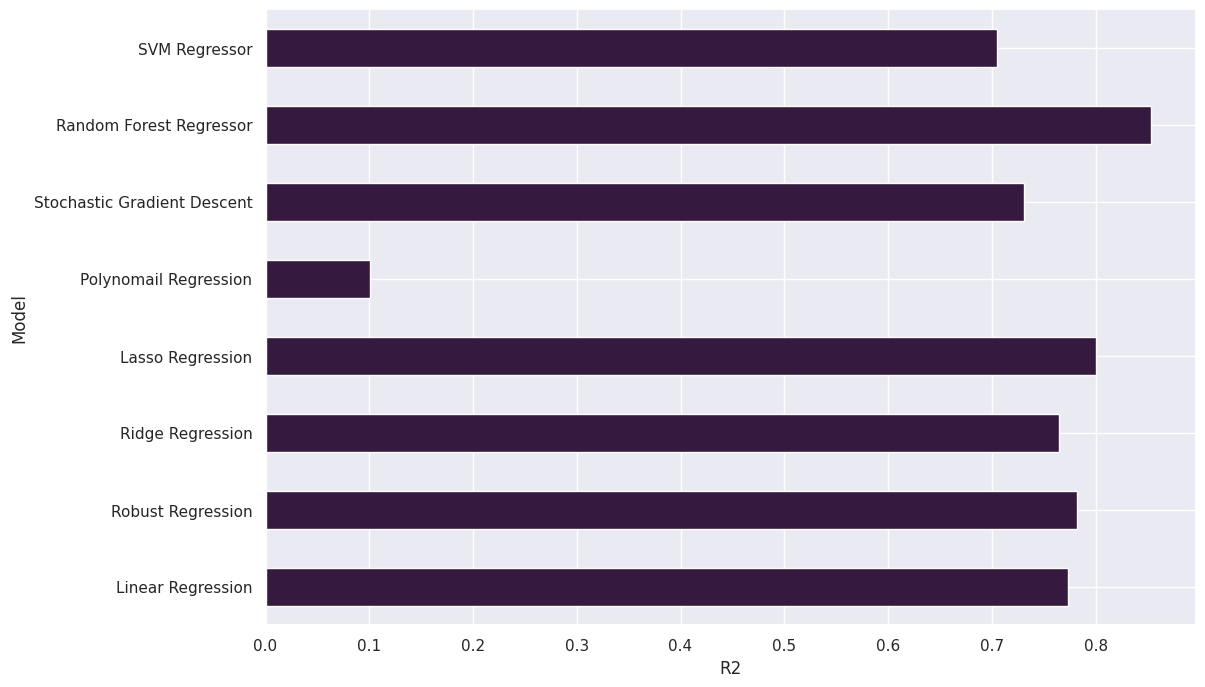

In [98]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))
plt.xlabel('R2')

# Save the Weights of the model 

In [99]:
import pickle
# open a file, where you ant to store the data
file = open('SP_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_reg, file)